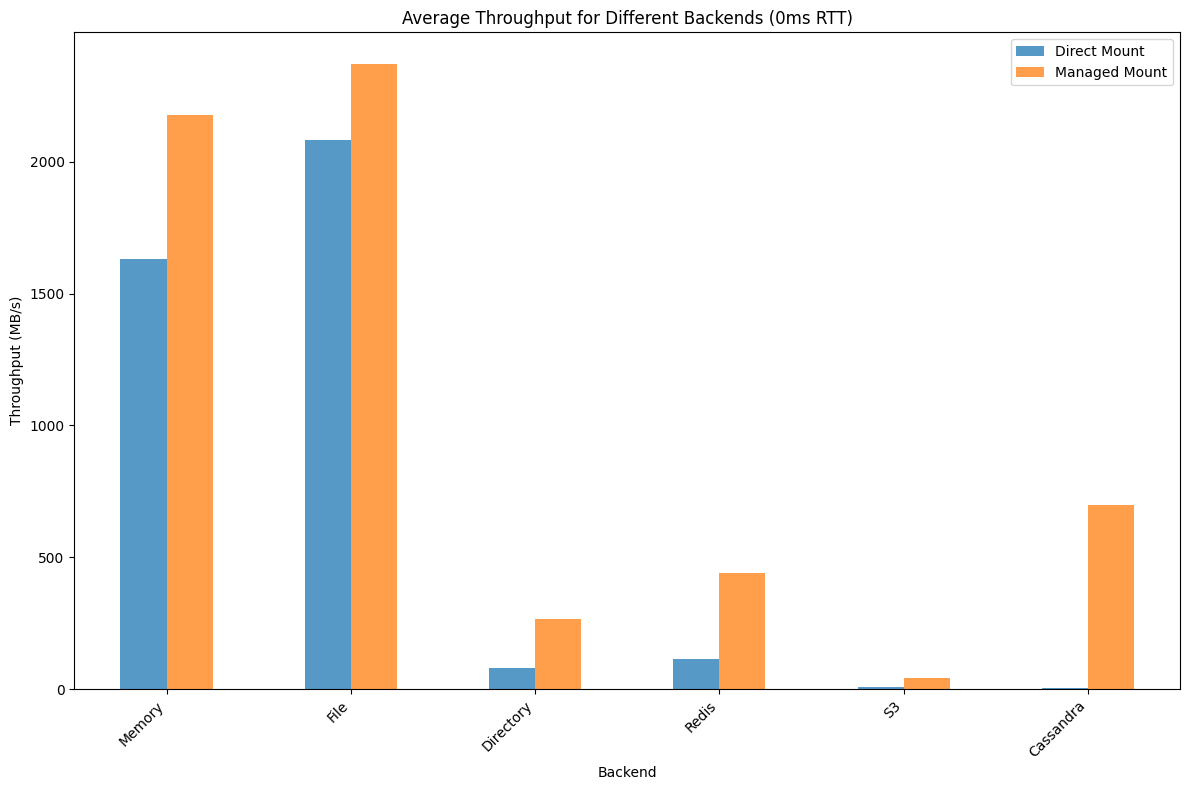

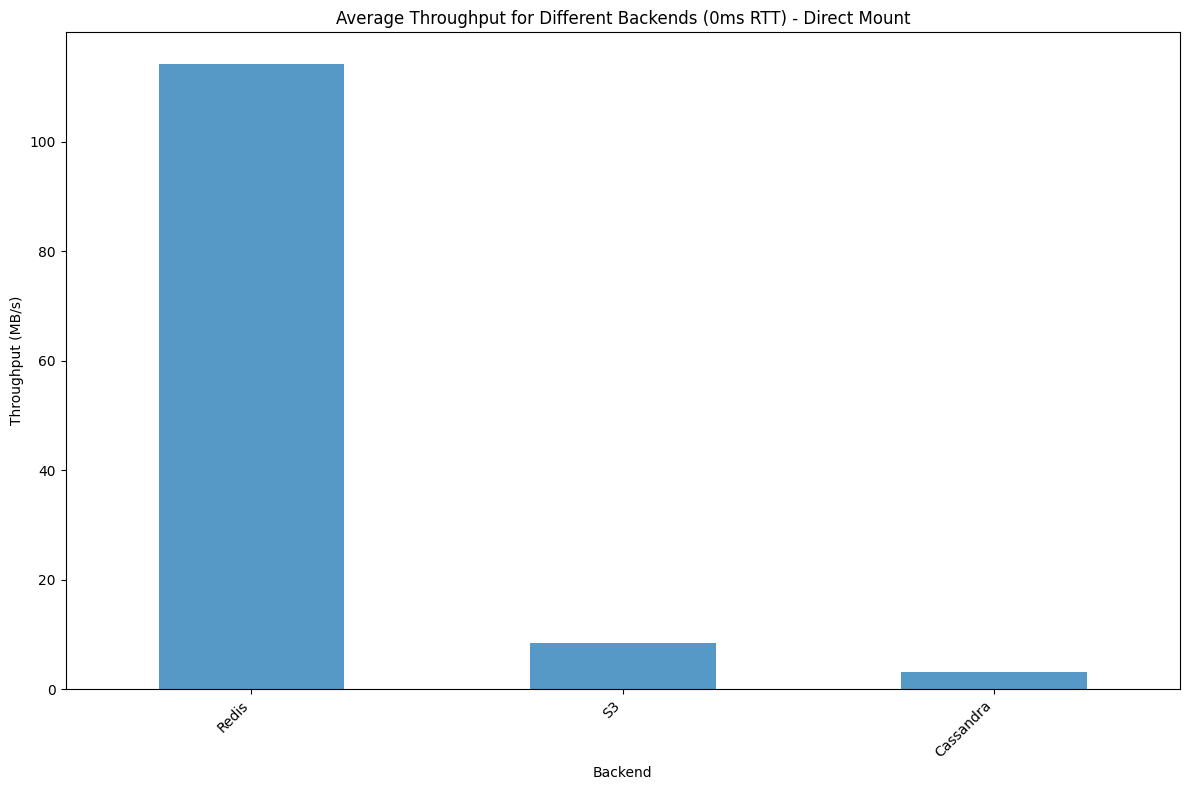

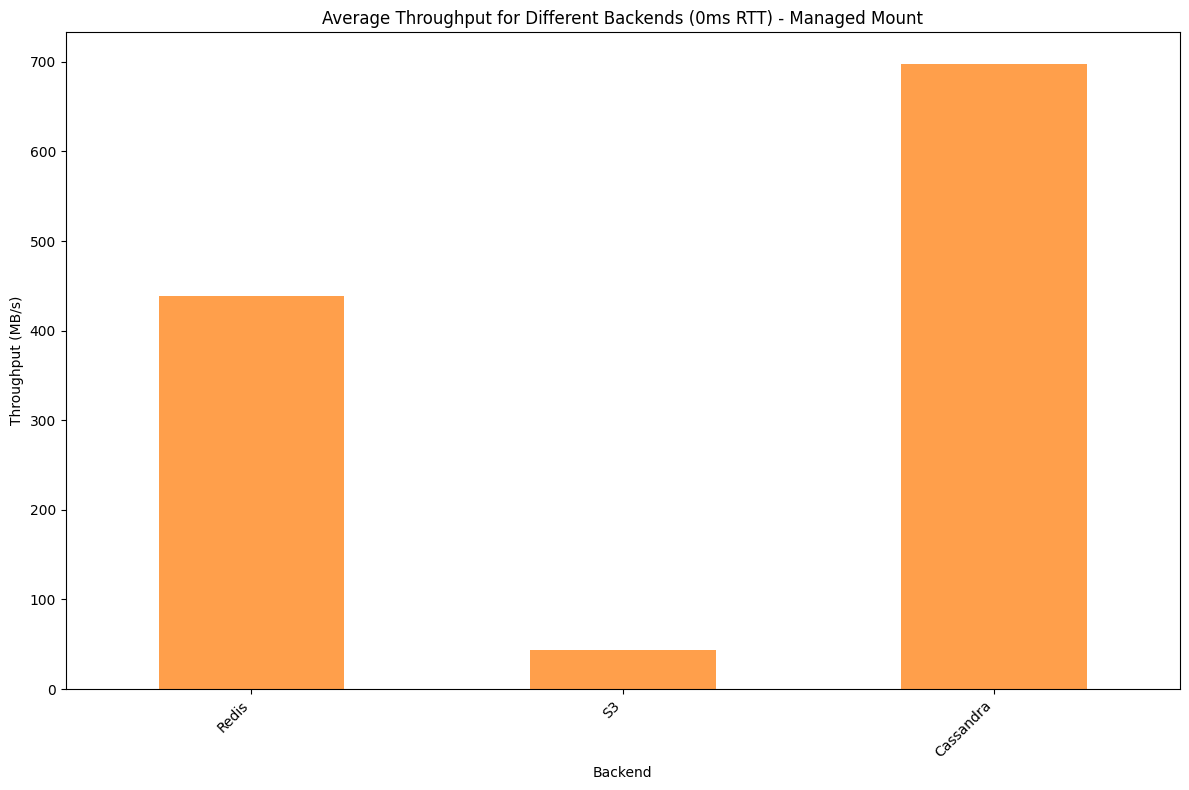

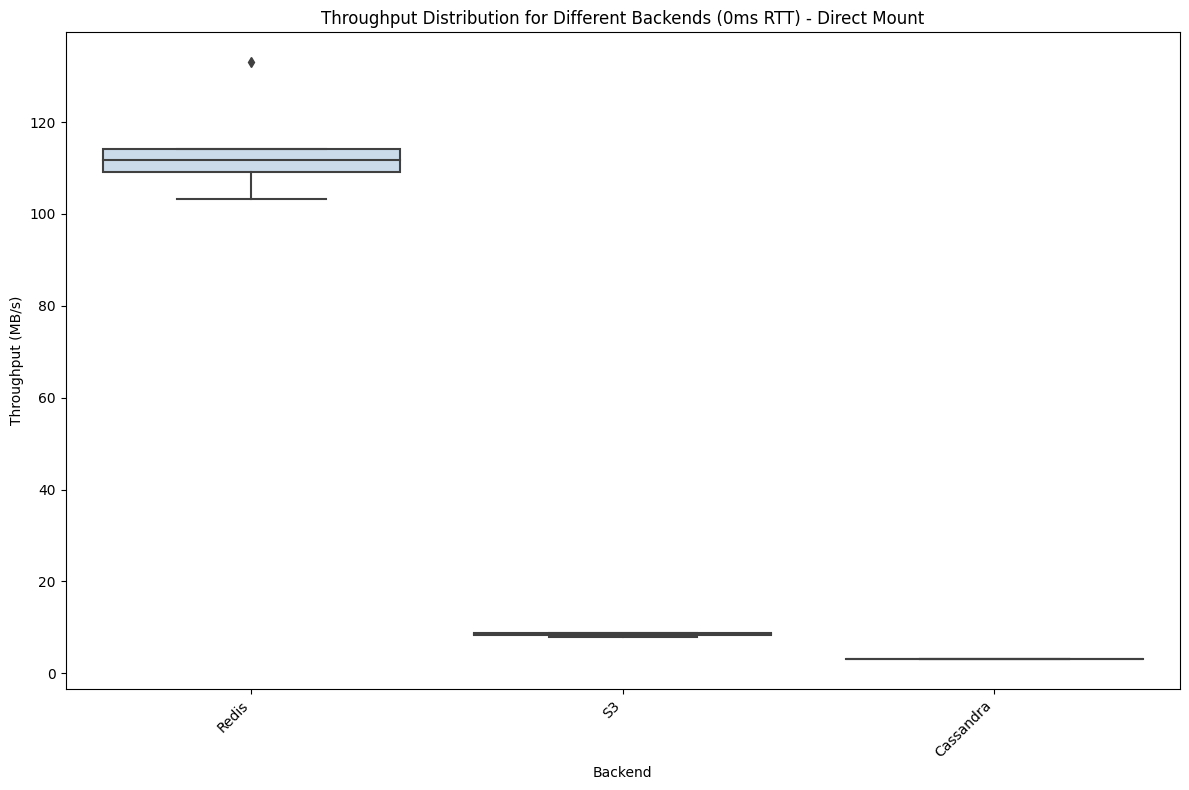

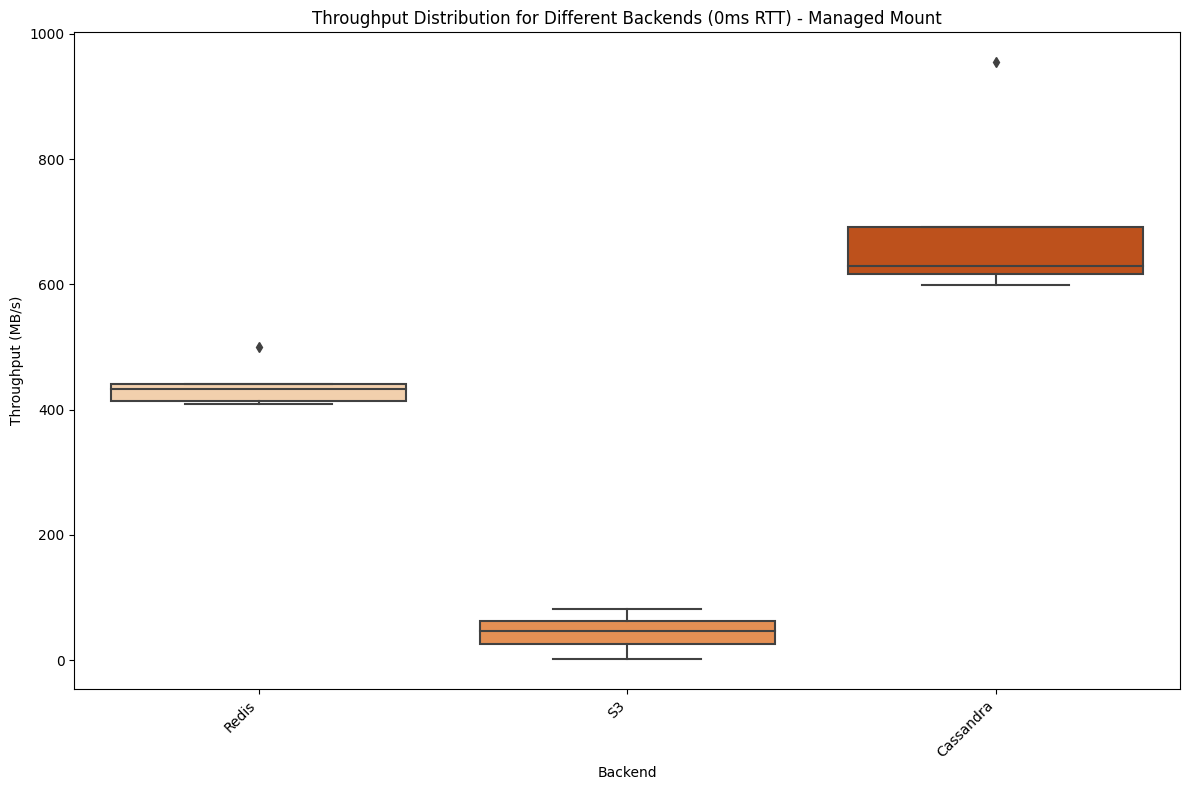

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv('../bench/throughput-backendvar/results.csv')

# Calculate the average throughput for each backend for each mount type
direct_mount = data.filter(regex='Direct Mount').mean()
managed_mount = data.filter(regex='Managed Mount').mean()

# Prepare data for plotting
direct_mount = direct_mount.rename(lambda x: x.split(' (')[0])
managed_mount = managed_mount.rename(lambda x: x.split(' (')[0])
plot_data = pd.DataFrame({'Direct Mount': direct_mount, 'Managed Mount': managed_mount})

# Simplify labels
plot_data.index = plot_data.index.str.replace('Throughput for ', '')
plot_data.index = plot_data.index.str.replace(' Backend', '')

# Bar plot for both Direct and Managed Mounts
fig, ax = plt.subplots(figsize=(12, 8))
plot_data.plot(kind='bar', ax=ax, color=['#1f77b4', '#ff7f0e'], alpha=0.75)
plt.title('Average Throughput for Different Backends (0ms RTT)')
plt.ylabel('Throughput (MB/s)')
plt.xlabel('Backend')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Exclude 'File', 'Memory', and 'Directory' backends
plot_data_direct = plot_data['Direct Mount'].drop(['File', 'Memory', 'Directory'])
plot_data_managed = plot_data['Managed Mount'].drop(['File', 'Memory', 'Directory'])

# Plot for Direct Mount
fig, ax = plt.subplots(figsize=(12, 8))
plot_data_direct.plot(kind='bar', ax=ax, color='#1f77b4', alpha=0.75)
plt.title('Average Throughput for Different Backends (0ms RTT) - Direct Mount')
plt.ylabel('Throughput (MB/s)')
plt.xlabel('Backend')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot for Managed Mount
fig, ax = plt.subplots(figsize=(12, 8))
plot_data_managed.plot(kind='bar', ax=ax, color='#ff7f0e', alpha=0.75)
plt.title('Average Throughput for Different Backends (0ms RTT) - Managed Mount')
plt.ylabel('Throughput (MB/s)')
plt.xlabel('Backend')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Prepare data for box plots
box_plot_data_direct = data.filter(regex='Direct Mount').rename(columns=lambda x: x.split(' (')[0].replace('Throughput for ', '').replace(' Backend', ''))
box_plot_data_direct = box_plot_data_direct.drop(['File', 'Memory', 'Directory'], axis=1)

box_plot_data_managed = data.filter(regex='Managed Mount').rename(columns=lambda x: x.split(' (')[0].replace('Throughput for ', '').replace(' Backend', ''))
box_plot_data_managed = box_plot_data_managed.drop(['File', 'Memory', 'Directory'], axis=1)

# Box plot for Direct Mount
fig, ax = plt.subplots(figsize=(12, 8))
sns.boxplot(data=box_plot_data_direct, ax=ax, palette="Blues")
plt.title('Throughput Distribution for Different Backends (0ms RTT) - Direct Mount')
plt.ylabel('Throughput (MB/s)')
plt.xlabel('Backend')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Box plot for Managed Mount
fig, ax = plt.subplots(figsize=(12, 8))
sns.boxplot(data=box_plot_data_managed, ax=ax, palette="Oranges")
plt.title('Throughput Distribution for Different Backends (0ms RTT) - Managed Mount')
plt.ylabel('Throughput (MB/s)')
plt.xlabel('Backend')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()